In [1]:
!pip install torch-summary

In [2]:
from torchsummary import summary

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader , random_split
from PIL import Image
from tabulate import tabulate
import time
import random
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
dir_ = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset' 

os.listdir(dir_)

['Karacadag',
 'Basmati',
 'Jasmine',
 'Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala']

In [4]:
Classes = os.listdir(dir_)
Classes.remove("Rice_Citation_Request.txt")
Classes

['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

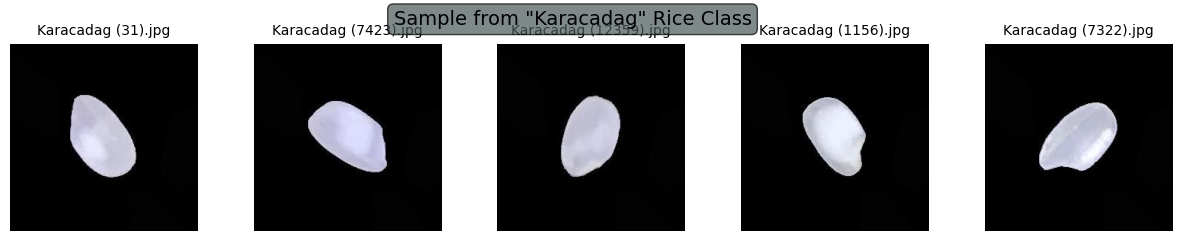

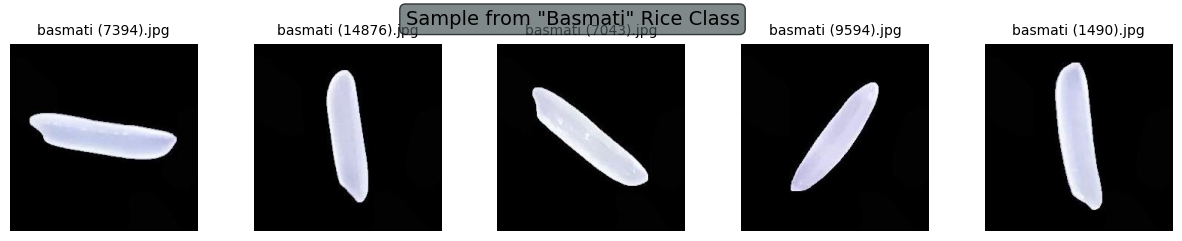

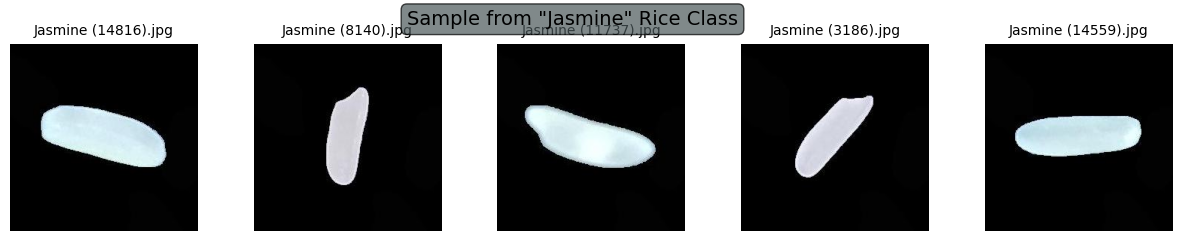

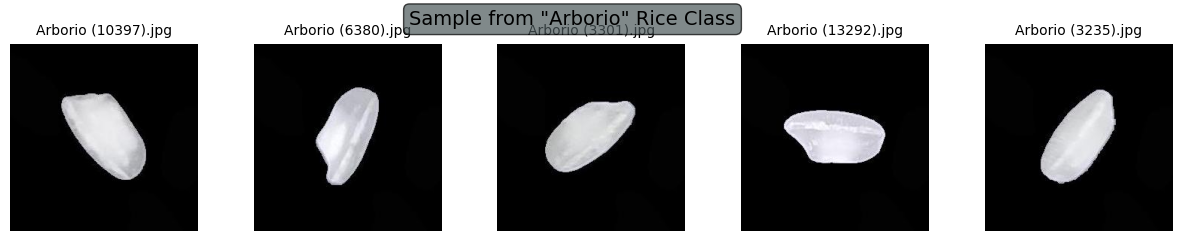

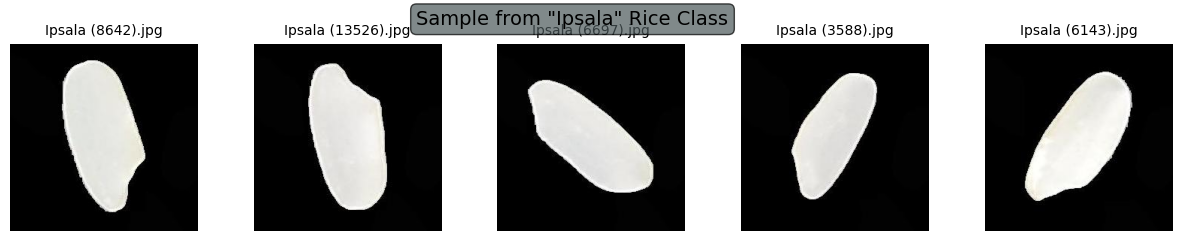

In [5]:
# Assuming `Classes` and `dir_` are predefined

# Loop through each rice class
for rice_class in Classes:
    class_dir = os.path.join(dir_, rice_class)  # The directory path of the rice class images
    images_path = os.listdir(class_dir)  # List of images in the directory

    # Check if the directory has at least 5 images, otherwise use the available images
    num_images = min(len(images_path), 5)
    random_images = random.sample(images_path, k=num_images)  # Randomly select `num_images` images

    # Create a figure with a title
    fig, ax = plt.subplots(1, num_images, figsize=(3 * num_images, 3))  # Adjust figure size based on number of images
    plt.suptitle(f'Sample from "{rice_class}" Rice Class', fontsize=14,
                 bbox=dict(facecolor='#4A5759', alpha=0.7, boxstyle='round,pad=0.3'), y=0.92)  # Title for each sample

    # Loop for each selected image
    for i, random_image in enumerate(random_images):
        image_path = os.path.join(class_dir, random_image)  # Create image path
        image = Image.open(image_path)  # Open the image

        ax[i].imshow(image)  # Plot the image
        ax[i].set_title(random_image, fontsize=10)  # Optional: Display the image file name as title
        ax[i].axis('off')  # Remove the axis

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjusted spacing
    plt.show()  # Display the figure

    print('\n')  # Print a new line for better readability in the output


In [6]:
# Distribution of each class

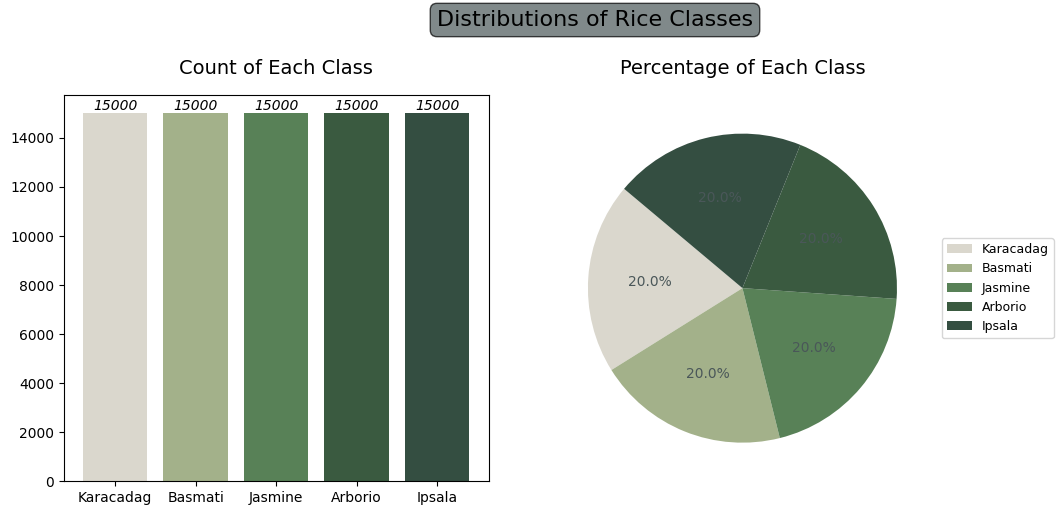

In [7]:
import os
import matplotlib.pyplot as plt

# Assuming `Classes` and `dir_` are predefined

# Get the count of images for each class
class_count = [len(os.listdir(os.path.join(dir_, rice_class))) for rice_class in Classes]

# Define colors for the plots
color = ['#dad7cd', '#a3b18a', '#588157', '#3a5a40', '#344e41']

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('Distributions of Rice Classes', fontsize=16,
             bbox=dict(facecolor='#4A5759', alpha=0.7, boxstyle='round,pad=0.3'), y=1.02)

# Bar Plot - Count of each class
ax[0].set_title("Count of Each Class", fontsize=14, pad=15)
bars = ax[0].bar(Classes, class_count, color=color)

# Adding data labels to the bar plot
for bar, count in zip(bars, class_count):
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
               ha='center', va='bottom', fontstyle="italic", fontsize=10)

# Pie Chart - Percentage of each class
ax[1].set_title('Percentage of Each Class', fontsize=14, pad=15)
wedges, texts, autotexts = ax[1].pie(class_count, labels=Classes, autopct='%1.1f%%', colors=color,
                                     startangle=140, textprops=dict(color="w"))

# Customizing the labels in the pie chart
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('#4A5759')  # Adjust text color for better visibility

# Adding legend outside the pie chart
ax[1].legend(wedges, Classes, fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.8)
plt.show()


In [8]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224 , 224)) , # Resize images to 224x224
    transforms.ToTensor() , # Convert images to PyTorch tensors
    transforms.Normalize( mean = 0 , std = 1) # Normalizing Images
])

In [9]:
##Preprocessing and pre modeling
#load images
dataset = datasets.ImageFolder(root=dir_, transform = transform)

In [10]:
#Split Data
# Calculating the number of our data points
num_data = len(dataset)

# Set the lengths of the train, validation, and test sets
train_size = int(0.7 * num_data)  # 70% for training
val_size = int(0.15 * num_data)   # 15% for validation
test_size = num_data - (train_size + val_size)  # Remaining 15% for testing

In [11]:
# Split the dataset into train, validation, and test sets
train_dataset , val_dataset , test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [12]:
# Create DataLoaders for each subset
train = DataLoader(train_dataset , batch_size = 32 , shuffle = True , num_workers = 2)
val = DataLoader(val_dataset , batch_size = 32 , shuffle = True , num_workers = 2)
test = DataLoader(test_dataset , batch_size = 32 , shuffle = True , num_workers = 2)

In [13]:
# device choosing
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [14]:
class CNN(nn.Module) :
    
    def __init__(self) :
        
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            
            # First conv layer
            nn.Conv2d(in_channels = 3 , out_channels = 32 , kernel_size = (3,3) , stride = 1), # 64 conv filter
            nn.BatchNorm2d(32), # Normalize the outputs of the previous layer
            nn.ReLU(), # Apply ReLU activation
            nn.MaxPool2d(kernel_size = (2,2) , stride = 2), # Reduce spatial dimensions by half
            
            
            # ُSecond conv layer
            nn.Conv2d(in_channels = 32 , out_channels = 64 , kernel_size = (3,3) , stride = 1), # 64 conv filter
            nn.BatchNorm2d(64), # Normalize the outputs of the previous layer
            nn.ReLU(), # Apply ReLU activation
            nn.BatchNorm2d(64), # Normalize the outputs of the previous layer
            nn.Conv2d(in_channels = 64 , out_channels = 64 , kernel_size = (3,3) , stride = 1), # 64 conv filter
            nn.ReLU(), # Apply ReLU activation
            nn.MaxPool2d(kernel_size = (2,2) , stride = 2), # Reduce spatial dimensions by half
            
            
            # Third conv layer
            nn.Conv2d(in_channels = 64 , out_channels = 128 , kernel_size = (3,3) , stride = 1), # 128 conv filter
            nn.BatchNorm2d(128), # Normalize the outputs of the previous layer
            nn.ReLU(), # Apply ReLU activation
            nn.Conv2d(in_channels = 128 , out_channels = 128 , kernel_size = (3,3) , stride = 1), # 128 conv filter
            nn.BatchNorm2d(128), # Normalize the outputs of the previous layer
            nn.ReLU(), # Apply ReLU activation
            nn.MaxPool2d(kernel_size = (2,2) , stride = 2) # Reduce spatial dimensions by half
            
        )
        
        self.fully_connected = nn.Sequential(
            
            # Fully conected layer
            nn.Linear(73728 , 512), # Fully connected layer with 512 node
            nn.ReLU(),
            nn.Dropout(0.3), # Dropout layer for regularization
            nn.Linear(512 , 5) # Final layer: From 512 units to the number of classes
        )
        
    def forward(self , X) :
            
        out = self.conv_layers(X)
        out = torch.flatten(out , 1)
        out = self.fully_connected(out)
        return out # Return the final output (logits or class scores)
            
model = CNN()
model.to(device) # Move the model to the specified device

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (15): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 

In [15]:
#add the EarlyStop Callback
class EarlyStop:
    
    def __init__(self, patience, min_delta,start_from_epoch):
        self.patience = patience
        self.min_delta = min_delta
        self.start_from_epoch = start_from_epoch
        self.counter = 0
        self.best_val_loss = None
        self.early_stop = False
    def __call__(self , val_loss , epoch) :
        
        if self.start_from_epoch <= epoch :
    
            if self.best_val_loss == None :
                self.best_val_loss = val_loss
                
            elif (val_loss<self.best_val_loss) and ((self.best_val_loss-val_loss > self.min_delta )) :
                self.best_val_loss = val_loss
                self.counter = 0
                
            elif val_loss>=self.best_val_loss :
                self.counter += 1
                
                if self.counter == self.patience :
                    self.early_stop = True

In [16]:
#Modeling

In [17]:
# train the mdel with th given data

In [18]:
# Define Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# A scheduler to reduce learning rate when there is no improvement
Scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer = optimizer ,
    factor = 0.5 , 
    patience = 2 , 
    threshold = 0.001,
    min_lr = 1e-5)

# A callback to stop training after 5 epoch without any improvement
early_stopping = EarlyStop(
    min_delta = 0.001 , # Minimum change in the monitored quantity to qualify as an improvement
    patience = 5 , # Number of epochs with no improvement after which training will be stopped
    start_from_epoch = 5) # Number of epochs to wait before starting to monitor improvement

# Number of epochs for training
num_epochs = 20

# Initialize arrays to store loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_val_loss = float('inf') # Starter point for finding the best model to save
learning_rate = []

training_start_time = time.time() # Beginning of training
# A loop for each epoch
for epoch in range(num_epochs) :
    
    print(f'Epoch [{epoch+1}/{num_epochs}]\n-------------------------------')
    
    # Reset the accuracy and loss of epoch
    train_loss = []
    val_loss = []
    corrected_train = 0
    corrected_val = 0
    
    # Set model to train mode
    model.train()
    
    epoch_start_time = time.time() # Beginning of epoch

    # A loop through batches
    for batch , (X , y) in enumerate(train) :
        
        # Move X and y to the device (GPU)
        X = X.to(device)
        y = y.to(device)
        
        # Compute predicted labels and loss
        train_batch_pred = model(X)
        loss = loss_fn(train_batch_pred , y)
        
        # Backward pass: Compute gradients
        loss.backward() 
        optimizer.step()
        
        # Reset gradients
        optimizer.zero_grad()
        
        # Store loss and the number of corectly predicted samples
        train_loss.append(loss.item())
        _ , pred_label = torch.max(train_batch_pred , 1)
        corrected_train += (pred_label == y).sum().item()
        
        if batch % 200 == 0:

            print(f"loss: {np.mean(train_loss):>7f}  [{batch:>3d}/{len(train):>3d}]")
    
    # Update the list of accuracy and losses
    train_loss = np.mean(train_loss)
    train_losses.append(train_loss)
    train_accs.append((corrected_train/train_size)*100)
    
    # Set model to evaluation mode
    model.eval()
    
    with torch.no_grad(): # No need to track gradients during validation

        # A loop through each batch of validation dataset
        for X , y in val :
            
            # Move X and y to the device (GPU)
            X = X.to(device)
            y = y.to(device)
            
            # Compute predicted labels and loss
            val_batch_pred = model(X)
            loss = loss_fn(val_batch_pred , y)
            
            # Store loss and the number of corectly predicted samples
            val_loss.append(loss.item())
            _ , pred_label = torch.max(val_batch_pred , 1)
            corrected_val += (pred_label == y).sum().item()
            
    # Update the list of accuracy and losses        
    val_loss = np.mean(val_loss)
    val_losses.append(val_loss)
    val_accs.append((corrected_val/val_size)*100)
    
    # Print current learning rate
    for param_group in optimizer.param_groups:
        print(f"Current learning rate: {param_group['lr']}")
        learning_rate.append(param_group['lr'])

    # Call scheduler.step with validation loss
    Scheduler.step(val_loss)
    
    # Saving the best model
    if val_loss<best_val_loss :
        best_val_loss = val_loss
        best_model_wts = model.state_dict()
        print("Best model weights saved.")
        
    epoch_end_time = time.time() # End of epoch
    epoch_time = epoch_end_time - epoch_start_time
        
    # Print the metrics for the current epoch
    print(f'Errors : \n'
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accs[epoch]:.4f} | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accs[epoch]:.4f} | '
          f'Duration: {(epoch_time//60)} minutes and {(epoch_time%60):.2f} seconds')
    print('\n'*2)
    
    # Decide if we should stop in this epoch
    early_stopping(val_loss , epoch)
    if early_stopping.early_stop :
        print("Early stopping triggered!")
        break
        
training_end_time = time.time() # End of training
duration = training_end_time - training_start_time # Training time
print(f"\nTotal training time : {(duration//60)} minutes and {(duration%60):.2f} seconds")

torch.save(best_model_wts, "rice_classification_model.pth")

Epoch [1/20]
-------------------------------
loss: 1.673535  [  0/1641]
loss: 1.262967  [200/1641]
loss: 0.683185  [400/1641]
loss: 0.489997  [600/1641]
loss: 0.393101  [800/1641]
loss: 0.330488  [1000/1641]
loss: 0.292051  [1200/1641]
loss: 0.265190  [1400/1641]
loss: 0.242880  [1600/1641]
Current learning rate: 0.001
Best model weights saved.
Errors : 
Train Loss: 0.2399, Train Accuracy: 94.9619 | Val Loss: 0.0863, Val Accuracy: 97.5200 | Duration: 4.0 minutes and 7.49 seconds



Epoch [2/20]
-------------------------------
loss: 0.563519  [  0/1641]
loss: 0.072543  [200/1641]
loss: 0.063846  [400/1641]
loss: 0.060434  [600/1641]
loss: 0.057083  [800/1641]
loss: 0.057364  [1000/1641]
loss: 0.055910  [1200/1641]
loss: 0.056337  [1400/1641]
loss: 0.056128  [1600/1641]
Current learning rate: 0.001
Errors : 
Train Loss: 0.0558, Train Accuracy: 98.2705 | Val Loss: 0.1442, Val Accuracy: 95.9644 | Duration: 3.0 minutes and 47.99 seconds



Epoch [3/20]
-------------------------------
loss: 

In [20]:
# Loading Best Model
model.load_state_dict(torch.load("rice_classification_model.pth"))

# Create a dictionary to store the training and validation metrics
history = {
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Accuracy': train_accs,
    'Val_Accuracy': val_accs,
    'Learning Rate': learning_rate}

In [21]:
# Convert result of training to a df
model_performance = pd.DataFrame(history)
print(tabulate(model_performance, headers='keys', tablefmt='psql'))

+----+--------------+------------+------------------+----------------+-----------------+
|    |   Train_Loss |   Val_Loss |   Train_Accuracy |   Val_Accuracy |   Learning Rate |
|----+--------------+------------+------------------+----------------+-----------------|
|  0 |  0.239907    | 0.0862515  |          94.9619 |        97.52   |        0.001    |
|  1 |  0.055802    | 0.144185   |          98.2705 |        95.9644 |        0.001    |
|  2 |  0.0415651   | 0.025344   |          98.7543 |        99.2533 |        0.001    |
|  3 |  0.0373087   | 0.0266035  |          98.9162 |        99.3244 |        0.001    |
|  4 |  0.0283027   | 0.0300484  |          99.1619 |        99.2178 |        0.001    |
|  5 |  0.024537    | 0.197693   |          99.2495 |        95.36   |        0.001    |
|  6 |  0.0122059   | 0.0245367  |          99.6381 |        99.3244 |        0.0005   |
|  7 |  0.01189     | 0.0185495  |          99.6648 |        99.4933 |        0.0005   |
|  8 |  0.00921817  |

In [22]:
## Evaluation

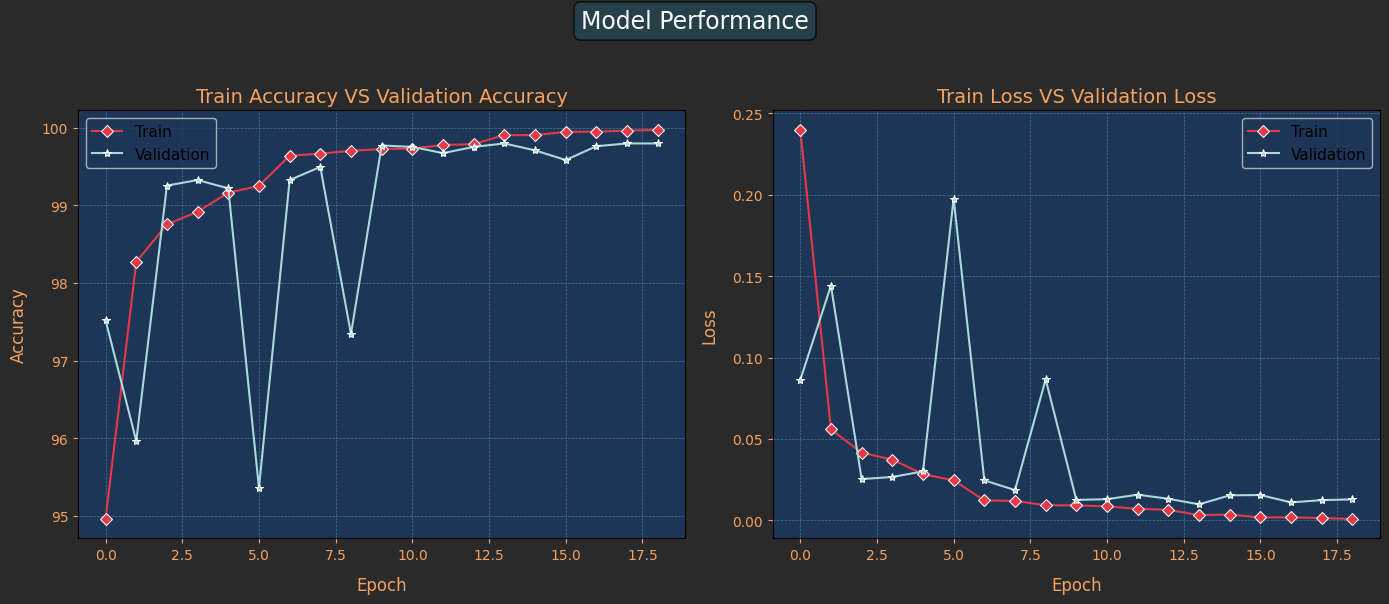

In [24]:
# Number of epochs
epochs = len(train_losses)  

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle(f'Model Performance', fontsize=17, color='#f8f9fa', 
             bbox=dict(facecolor='#264653', alpha=0.8, boxstyle='round,pad=0.3'), y=1)

# Custom background color for the entire figure
fig.patch.set_facecolor('#2a2a2a')

# Accuracy plot
ax[0].set_title("Train Accuracy VS Validation Accuracy", fontsize=14, color='#f4a261')
ax[0].set_ylabel("Accuracy", fontsize=12, color='#f4a261', labelpad=10)
ax[0].set_xlabel("Epoch", fontsize=12, color='#f4a261', labelpad=10)
ax[0].set_facecolor('#1d3557')  # Set axis background color

# Change the line style and marker
sns.lineplot(x=range(epochs), y=model_performance['Train_Accuracy'], label='Train', 
             color='#e63946', marker='D', ls='-', ax=ax[0])
sns.lineplot(x=range(epochs), y=model_performance['Val_Accuracy'], label='Validation', 
             color='#a8dadc', marker='*', ls='-', ax=ax[0])
ax[0].legend(facecolor='#1d3557', fontsize=11, framealpha=0.8, loc='best')  # Custom legend style
ax[0].grid(color='#457b9d', linestyle='--', linewidth=0.5)  # Grid styling
ax[0].tick_params(axis='x', colors='#f4a261')
ax[0].tick_params(axis='y', colors='#f4a261')

# Loss plot
ax[1].set_title("Train Loss VS Validation Loss", fontsize=14, color='#f4a261')
ax[1].set_ylabel("Loss", fontsize=12, color='#f4a261', labelpad=10)
ax[1].set_xlabel("Epoch", fontsize=12, color='#f4a261', labelpad=10)
ax[1].set_facecolor('#1d3557')  # Set axis background color

# Change the line style and marker
sns.lineplot(x=range(epochs), y=model_performance['Train_Loss'], label='Train', 
             color='#e63946', marker='D', ls='-', ax=ax[1])
sns.lineplot(x=range(epochs), y=model_performance['Val_Loss'], label='Validation', 
             color='#a8dadc', marker='*', ls='-', ax=ax[1])
ax[1].legend(facecolor='#1d3557', fontsize=11, framealpha=0.8, loc='best')  # Custom legend style
ax[1].grid(color='#457b9d', linestyle='--', linewidth=0.5)  # Grid styling
ax[1].tick_params(axis='x', colors='#f4a261')
ax[1].tick_params(axis='y', colors='#f4a261')

# Show plot with updated styles
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()


In [26]:
## evaluate the dataset
# Initialize lists to store prediction labels and true labels
test_pred_label = []  # Predicted labels from the model
true_labels = []  # Ground truth labels

# Disable gradient calculation for validation to save memory and computations
with torch.no_grad(): 
    model.eval()  # Set the model to evaluation mode
    test_loss = []
    corrected_test = 0  # Counter for correctly predicted samples

    # Loop through each batch in the test dataset
    for X, y in test:
        # Move inputs and labels to the designated device (e.g., GPU)
        X, y = X.to(device), y.to(device)

        # Generate predictions and calculate the loss
        test_batch_pred = model(X)
        loss = loss_fn(test_batch_pred, y)
        
        # Accumulate the loss for averaging later
        test_loss.append(loss.item())

        # Get the predicted labels
        _, pred_label = torch.max(test_batch_pred, 1)

        # Count the number of correct predictions in this batch
        corrected_test += (pred_label == y).sum().item()
        
        # Store the predicted and true labels for further analysis
        test_pred_label.extend(pred_label.cpu().numpy())
        true_labels.extend(y.cpu().numpy())

    # Convert lists to numpy arrays for easier manipulation and analysis
    test_pred_label = np.array(test_pred_label)
    true_labels = np.array(true_labels)

    # Calculate average test loss and accuracy
    avg_test_loss = np.mean(test_loss)
    test_acc = (corrected_test / len(test.dataset)) * 100
    
    # Display the evaluation results with clear and formatted output
    print("\n--- Model Evaluation Results ---")
    print(f'Test Loss    : {avg_test_loss:.4f}')
    print(f'Test Accuracy: {test_acc:.2f}%')



--- Model Evaluation Results ---
Test Loss    : 0.0077
Test Accuracy: 99.83%


In [27]:
##Evaluate a random batch

In [28]:
# A loop through one batch of dataset
for X , y in test :

    # Move X and y to the device (GPU)
    X = X.to(device)
    y = y.to(device)
    break
# Compute predicted labels
test_batch_pred = model(X)
_ , pred_label = torch.max(test_batch_pred , 1)

output = torch.softmax(test_batch_pred, dim=1).squeeze()
prob , _ = torch.max(output , 1)

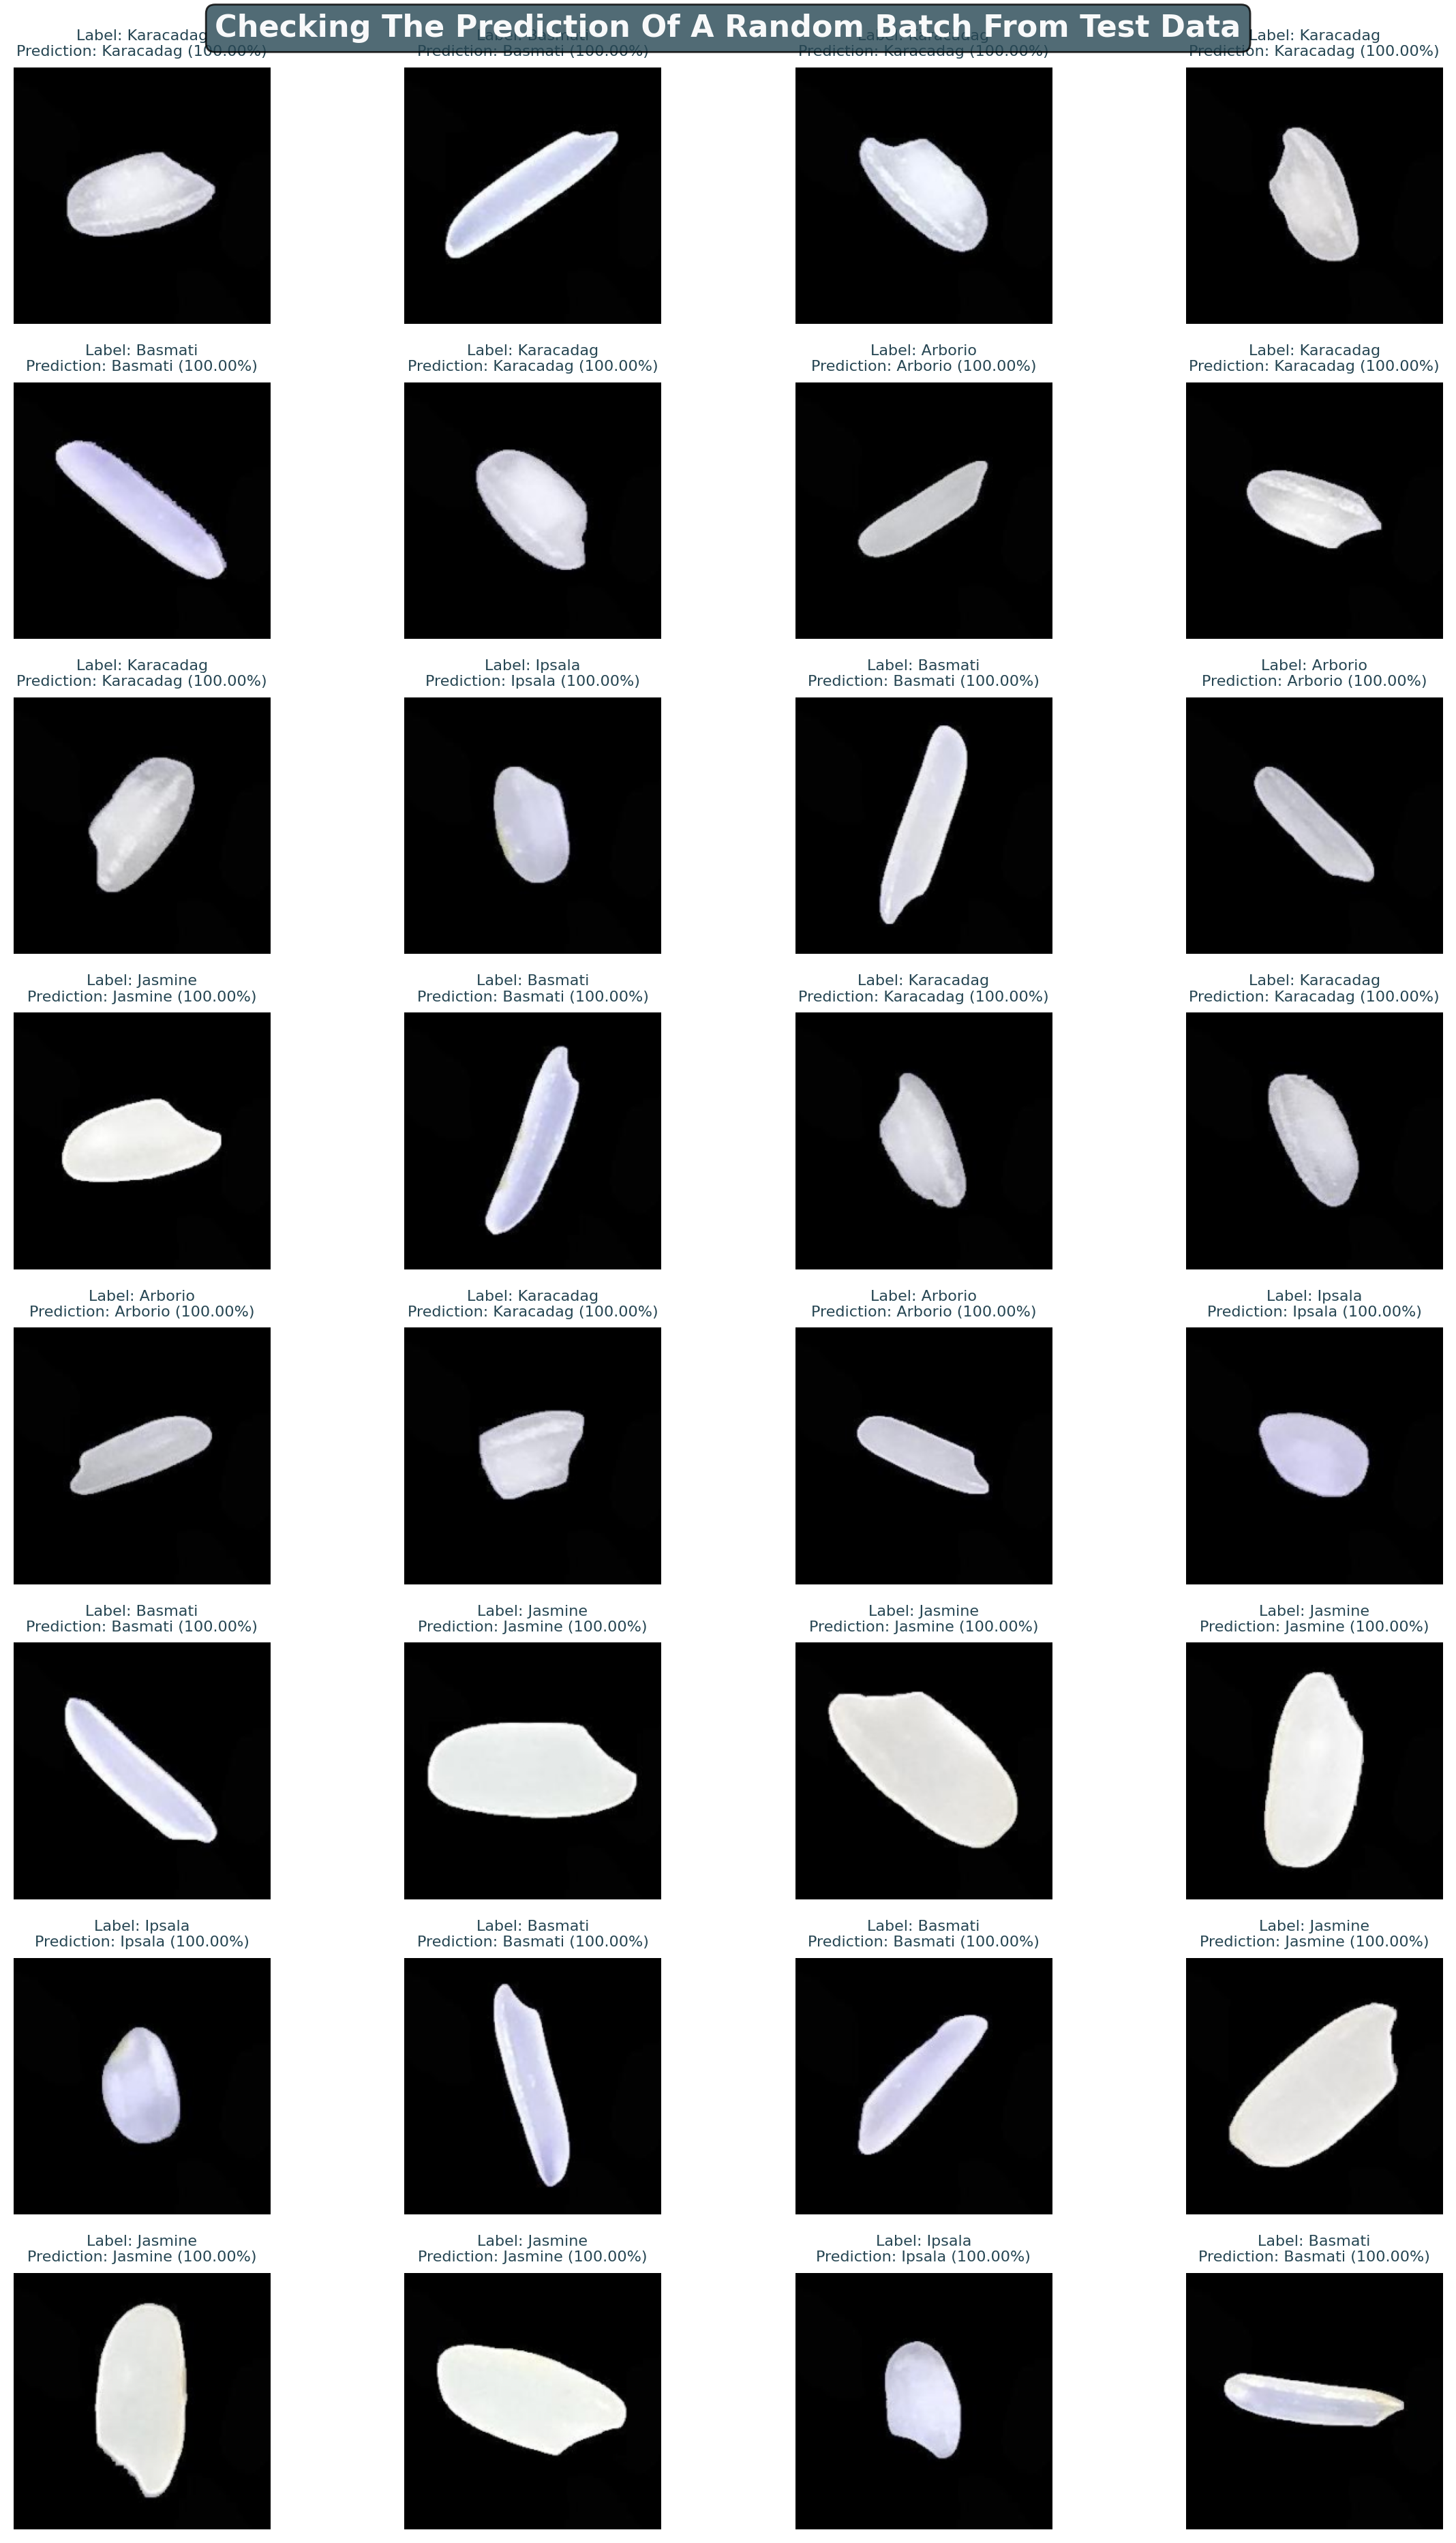

In [29]:
# Plotting a random batch of test images with their labels and predictions
fig, ax = plt.subplots(8, 4, figsize=(12, 20), dpi=200)
ax = ax.flatten()  # Flatten the axes array for easy iteration

# Super title for the entire figure
plt.suptitle(
    'Checking The Prediction Of A Random Batch From Test Data',
    fontsize=16,
    fontweight='bold',
    color='#f8f9fa',
    bbox=dict(facecolor='#264653', alpha=0.8, boxstyle='round,pad=0.3'),
    y=0.93
)

# Iterate through each subplot and add image, title with labels and predictions
for n, i in enumerate(ax):
    # Convert the tensor image to a numpy array and move to CPU for plotting
    img = X[n].permute(1, 2, 0).cpu().numpy()
    
    # Display the image
    i.imshow(img)
    i.axis('off')  # Remove axis ticks and labels

    # Set title with true and predicted labels and confidence percentage
    i.set_title(
        f"Label: {Classes[y[n]]}\n"
        f"Prediction: {Classes[pred_label[n]]} ({100 * (prob[n].item()):.2f}%)",
        fontsize=8, color='#264653'
    )

# Adjust layout to prevent overlapping of titles and images
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Classification Report:

              precision    recall  f1-score   support

   Karacadag       1.00      0.99      1.00      2269
     Basmati       1.00      1.00      1.00      2263
     Jasmine       1.00      1.00      1.00      2208
     Arborio       0.99      1.00      1.00      2283
      Ipsala       1.00      1.00      1.00      2227

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250



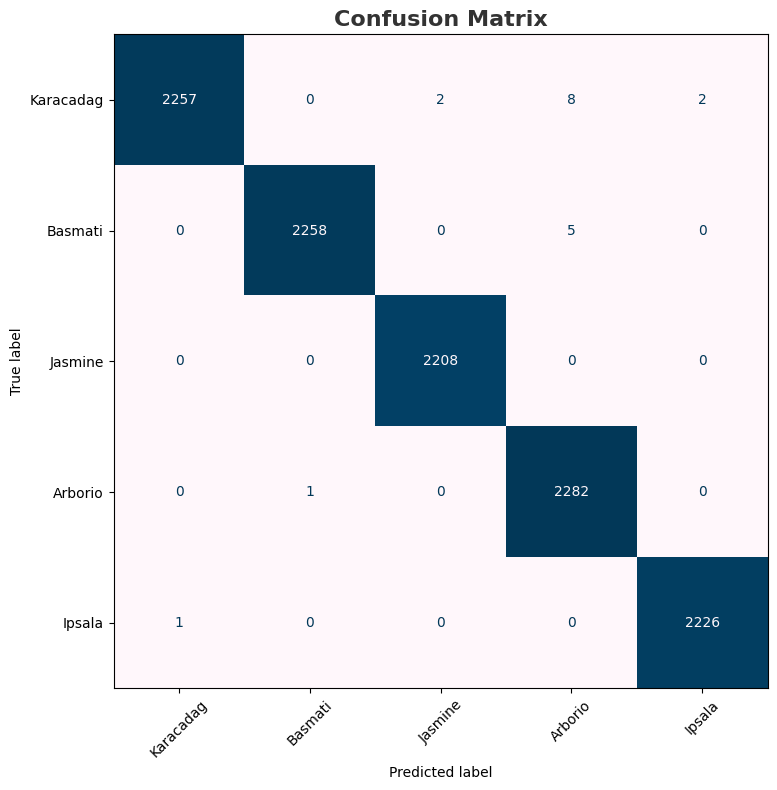

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Print the classification report with a custom color
print('\033[1;34m' + "Classification Report:\n" + '\033[0m')
print(classification_report(true_labels, test_pred_label, target_names=Classes))

# Create and display the confusion matrix
cm = confusion_matrix(true_labels, test_pred_label)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Classes)

# Customize the appearance of the confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size for better readability
cm_display.plot(ax=ax, colorbar=False, cmap='PuBu')

# Add a title and adjust styles
plt.title('Confusion Matrix', fontsize=16, weight='bold', color='#333333')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels upright

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
